# Влияние витамина C на рост зубов морских свинок
В эксперименте изучалось влияние витамина C на рост одонтобластов морских свинок. 

<img src="https://upload.wikimedia.org/wikipedia/commons/1/1c/Enamelmineralization11-17-05.jpg" alt="Drawing" style="width: 300px;"/>

Рассматривалось три дозы витамина (0.5, 1 и 2 мг) и два способа его приёма (апельсиновый сок и аскорбиновая кислота). В каждой из 6 групп по уровням двух факторов были произведены измерения для 10 морских свинок.

In [2]:
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('ToothGrowth.csv')
df.head()

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


In [4]:
df.supp.value_counts()

VC    30
OJ    30
Name: supp, dtype: int64

In [5]:
df.dose.value_counts()

2.0    20
1.0    20
0.5    20
Name: dose, dtype: int64

In [6]:
pd.crosstab(df.supp, df.dose)

dose,0.5,1.0,2.0
supp,,,
OJ,10,10,10
VC,10,10,10


In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot

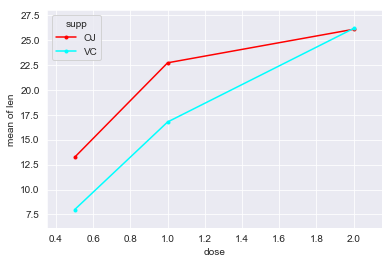

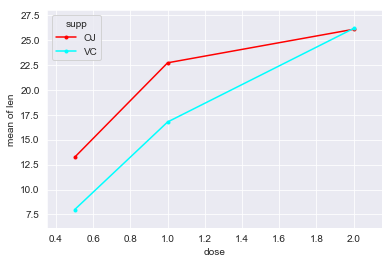

In [9]:
interaction_plot(df.dose, df.supp, df.len)

In [22]:
formula = 'len ~ C(supp) + C(dose) + C(supp):C(dose)'
model = ols('len ~ C(supp) + C(dose) + C(supp):C(dose)', df).fit()
aov_table = anova_lm(model, typ=2)
aov_table.round(4)

,sum_sq,df,F,PR(>F)
C(supp),205.3500,1.0,15.572,0.0002
C(dose),2426.4343,2.0,92.000,0.0000
C(supp):C(dose),108.3190,2.0,4.107,0.0219
Residual,712.1060,54.0,NaN,NaN


In [26]:
def add_eta_sq(aov):
    aov['eta_sq'] = aov[:-1]['sum_sq'] / aov['sum_sq'].sum()   
    
    return aov

add_eta_sq(aov_table)

,sum_sq,df,F,PR(>F),eta_sq
C(supp),205.350000,1.0,15.571979,2.311828e-04,0.059484
C(dose),2426.434333,2.0,91.999965,4.046291e-18,0.702864
C(supp):C(dose),108.319000,2.0,4.106991,2.186027e-02,0.031377
Residual,712.106000,54.0,NaN,NaN,NaN


In [12]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

oj_df = df[df.supp == 'OJ']
vc_df = df[df.supp == 'VC']
mc = MultiComparison(oj_df['len'], oj_df['dose'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.5    1.0     9.47  0.001  5.3104 13.6296   True
   0.5    2.0    12.83  0.001  8.6704 16.9896   True
   1.0    2.0     3.36 0.1308 -0.7996  7.5196  False
----------------------------------------------------


In [13]:
mc = MultiComparison(vc_df['len'], vc_df['dose'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   0.5    1.0     8.79 0.001  4.9025 12.6775   True
   0.5    2.0    18.16 0.001 14.2725 22.0475   True
   1.0    2.0     9.37 0.001  5.4825 13.2575   True
---------------------------------------------------


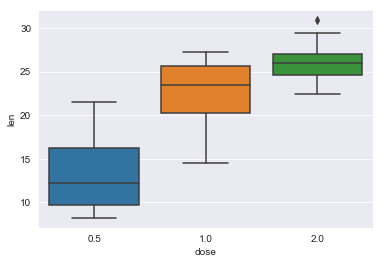

In [15]:
sns.boxplot('dose', 'len', data=oj_df)

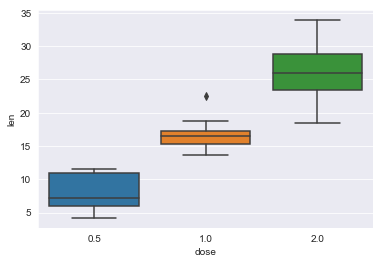

In [16]:
sns.boxplot('dose', 'len', data=vc_df)